<a href="https://colab.research.google.com/github/shekharkshitij/Deep_Learning/blob/main/DL(Lab02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ques 1: Image Classification with CIFAR-10 Dataset

Train two artificial neural networks (ANNs) on the CIFAR-10 dataset using mini-batch gradient descent. Apply hyperparameter tuning to both models, using different regularization techniques for each. Evaluate the models performance with visualizations of loss and accuracy, and display with reasoning as to which model performed better.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
def create_model_l2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(10))
    return model


In [ ]:
def create_model_dropout():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10))
    return model

In [ ]:
model_l2 = create_model_l2()
model_l2.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_dropout = create_model_dropout()
model_dropout.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [ ]:
history_l2 = model_l2.fit(train_images, train_labels, epochs=20,
                          validation_data=(test_images, test_labels),
                          batch_size=64, verbose=1)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 110ms/step - accuracy: 0.3107 - loss: 1.9490 - val_accuracy: 0.4955 - val_loss: 1.4755
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 82ms/step - accuracy: 0.5096 - loss: 1.4465 - val_accuracy: 0.5417 - val_loss: 1.3754
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.5589 - loss: 1.3494 - val_accuracy: 0.5820 - val_loss: 1.2902
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6005 - loss: 1.2504 - val_accuracy: 0.6255 - val_loss: 1.1904
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.6290 - loss: 1.1885 - val_accuracy: 0.6300 - val_loss: 1.1831
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6517 - loss: 1.1289 - val_accuracy: 0.6434 - val_loss: 1.1541
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.6657 - loss: 1.1013 - val_accuracy: 0.6667 - val_loss: 1.1034
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6772 - loss: 1.0662 

In [ ]:
history_dropout = model_dropout.fit(train_images, train_labels, epochs=10,
                                    validation_data=(test_images, test_labels),
                                    batch_size=64, verbose=1)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.2624 - loss: 1.9710 - val_accuracy: 0.4746 - val_loss: 1.4742
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.4558 - loss: 1.5184 - val_accuracy: 0.5412 - val_loss: 1.3097
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.5091 - loss: 1.3903 - val_accuracy: 0.5850 - val_loss: 1.1631
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.5470 - loss: 1.2854 - val_accuracy: 0.6147 - val_loss: 1.1039
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5755 - loss: 1.2159 - val_accuracy: 0.6371 - val_loss: 1.0316
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5988 - loss: 1.1583 - val_accuracy: 0.6416 - val_loss: 1.0296
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6124 - loss: 1.1144 - val_accuracy: 0.6417 - val_loss: 1.0330
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 91ms/step - accuracy: 0.6282 - loss: 1.0728 - 

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')
    plt.show()


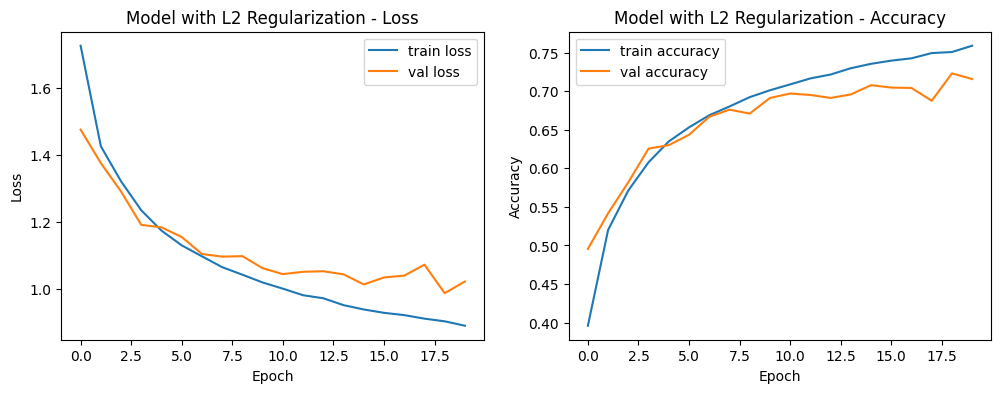

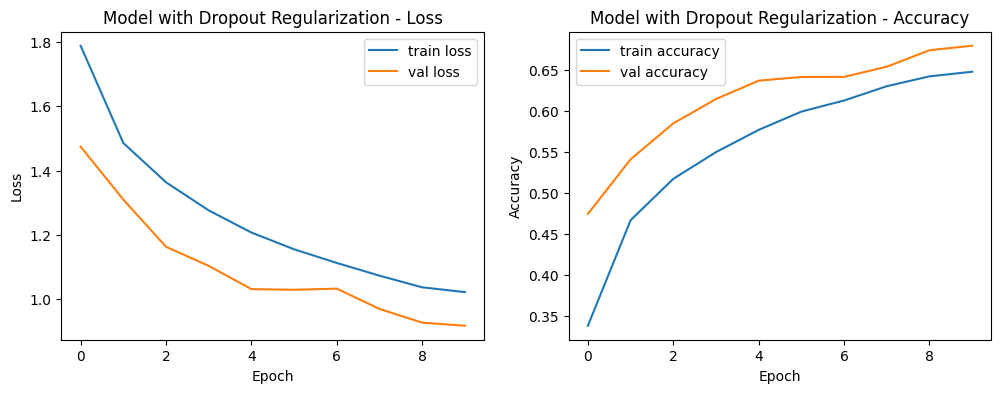

313/313 - 3s - 10ms/step - accuracy: 0.7157 - loss: 1.0210
313/313 - 5s - 15ms/step - accuracy: 0.6797 - loss: 0.9179


In [ ]:
plot_history(history_l2, 'Model with L2 Regularization')
plot_history(history_dropout, 'Model with Dropout Regularization')

# Evaluate both models on the test set
test_loss_l2, test_acc_l2 = model_l2.evaluate(test_images, test_labels, verbose=2)
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(test_images, test_labels, verbose=2)



In [ ]:
print(f'Model with L2 Regularization - Test Accuracy: {test_acc_l2:.4f}')
print(f'Model with Dropout Regularization - Test Accuracy: {test_acc_dropout:.4f}')

Model with L2 Regularization - Test Accuracy: 0.7157
Model with Dropout Regularization - Test Accuracy: 0.6797


##Ques 2: Predicting House Prices with the Boston Housing Dataset.
Implement an artificial neural network (ANN) for regression on the Boston Housing dataset, applying minibatch gradient descent, hyperparameter tuning and various regularization techniques. Assess the model using Mean Squared Error and visualize training progress.

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kerastuner as kt


<ipython-input-14-87018700b121>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def model_builder(hp):
    model = Sequential()
    hp_units = hp.Int('units', min_value=32, max_value=128, step=16)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_dropout_rate = hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])

    model.add(Dense(hp_units, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dropout(hp_dropout_rate))
    model.add(Dense(hp_units, activation='relu'))
    model.add(Dropout(hp_dropout_rate))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mse'])
    return model



In [ ]:
# Hyperparameter tuning
tuner = kt.RandomSearch(
    model_builder,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='boston_housing'
)

tuner.search(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[EarlyStopping(patience=5)])
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)


Trial 10 Complete [00h 00m 17s]
val_mse: 19.387069702148438

Best val_mse So Far: 11.793727397918701
Total elapsed time: 00h 02m 38s


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    validation_split=0.2,
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 471.5580 - mse: 471.5580 - val_loss: 63.1538 - val_mse: 63.1538
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 100.9355 - mse: 100.9355 - val_loss: 30.7540 - val_mse: 30.7540
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.9645 - mse: 41.9645 - val_loss: 15.7254 - val_mse: 15.7254
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.4185 - mse: 37.4185 - val_loss: 16.8913 - val_mse: 16.8913
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.1202 - mse: 42.1202 - val_loss: 15.4864 - val_mse: 15.4864
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.5223 - mse: 31.5223 - val_loss: 14.5581 - val_mse: 14.5581
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.9525 - mse: 36.9525 - val_loss: 20.1510 - val_mse: 20.1510
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.7647 - mse: 35.7647 - val_loss: 18.0295 - val_mse: 18.0295
Epoch 9/100
11/11 ━━━━━━━━━

In [ ]:
# Evaluate the model
test_loss, test_mse = model.evaluate(x_test, y_test)
print(f'Test MSE: {test_mse}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4532 - mse: 17.4532 
Test MSE: 22.483627319335938


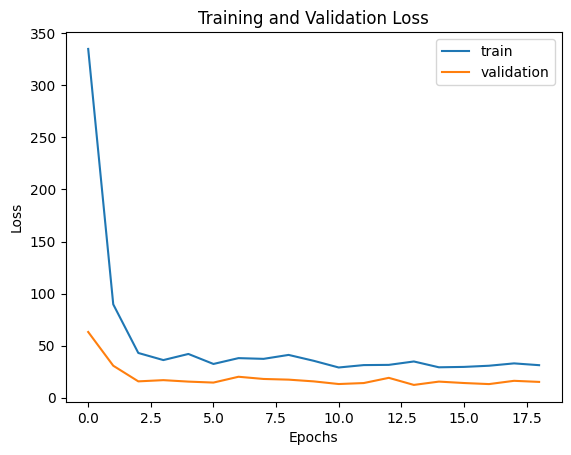

In [ ]:
# Visualize the training progress
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
